# Global Imports

In [65]:
from os import path
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

# Torch imports for model
import torch
import torch.optim as optim
import torch.nn as nn



# ISLP Functions Import
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

# Plotting
from utils.plot_functions import plot_data

# Task 8
perform a simple linear regression
with mpg as the response and horsepower as the predictor.

## Importing a Data

In [66]:
# impoerting data
Data = pd.read_csv(path.join("data", "Auto.csv"))
Data[0:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Data Peparation

In [67]:
X = np.array(Data['horsepower'], dtype=float)
Y = np.array(Data['mpg'], dtype=float)

## Spliting and Plotting a data

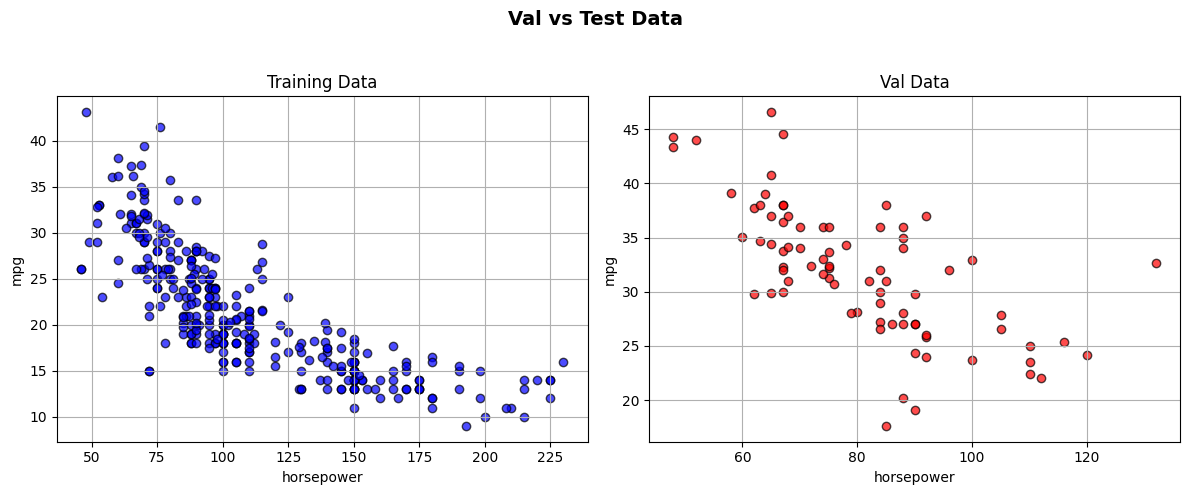

In [68]:
N = len(X)

#indexes
idx = np.arange(len(X))
train_idx = idx[:int(N*.8)]
val_idx = idx[int(N*0.8):]

#Predictor and Response
x_train, y_train = X[train_idx], Y[train_idx]
x_val, y_val = X[val_idx], Y[val_idx]

#Ploting a data
plot_data(x_train, y_train, x_val, y_val, xlabel="horsepower", ylabel="mpg")

## Preparing a dataset for gpu computation

In [70]:
# device import
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# randomizer set
torch.manual_seed(42)

# Create tensor for gpu
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

# normalizing input
x_train_tensor = x_train_tensor / x_train_tensor.max()
y_train_tensor = y_train_tensor / y_train_tensor.max()



cuda


## Creating a model

$$
Y = b + w \times X + \epsilon
$$
We will create a simple regression model via pytroch

In [77]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.b = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
        
        self.w = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))

    def forward(self, x):
        y = self.b + self.w*x
        
        return y

model = LinearRegression().to(device)
print(model.state_dict())

OrderedDict([('b', tensor([2.2082], device='cuda:0')), ('w', tensor([-0.6380], device='cuda:0'))])


## Adjusting a hyperparamters, criterion and optimizer

In [78]:
# Hyperparamters
lr = 0.001
epochs = 20

optimizer = optim.SGD(model.parameters(), lr=lr)
print(optimizer)

criterion = nn.MSELoss(reduction='mean')
print(criterion)



SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
MSELoss()


## Traing Loop

In [79]:
losses = [] # Yo for keeping track of loss

## In need of fixinbg

for i in range(epochs):
    model.train() # what bro it is not relly training model?
    
    y_pred = model(x_train_tensor) # Don't use foward U will use da hooks
    
    loss = criterion(y_pred, y_train_tensor)
    losses.append(float(loss))
    
    loss.backward() # calculate da gradients
    
    optimizer.step() # update the parameters
    optimizer.zero_grad()

print(model.state_dict())
print(losses)

OrderedDict([('b', tensor([2.1532], device='cuda:0')), ('w', tensor([-0.6645], device='cuda:0'))])
[1.9880027770996094, 1.9782605171203613, 1.9685664176940918, 1.9589203596115112, 1.9493216276168823, 1.9397701025009155, 1.9302657842636108, 1.9208086729049683, 1.9113984107971191, 1.9020342826843262, 1.892716884613037, 1.8834450244903564, 1.8742189407348633, 1.8650389909744263, 1.8559037446975708, 1.8468140363693237, 1.8377689123153687, 1.8287686109542847, 1.8198128938674927, 1.810901403427124]
